In [139]:
### IMPORT MODULES ###
import os
os.chdir('../')
from module import libnc4, libgen
os.chdir('./driver')

### IMPORT LIBRARIES ###
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

In [17]:
### DEFINE FILE PATHS ###
nc_path = '../data/ezaki_timeslice.nc'

### OPEN THE NETCDF FILE ###
dataset = nc.Dataset(nc_path, 'r')

### PRINT THE FILE AND VARIABLE INFORMATION ###
print("file information:")
print(dataset)
print("\nVariables:")
for variable in dataset.variables:
    print(variable)

file information:
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): z(500), nv(2), zh(501), x(384), xh(384), y(384), yh(384), CZ(504), FZ(505), FDZ(503), CX(388), CY(388), FX(389), FY(389), CXG(388), CYG(388), FXG(389), FYG(389), FDXG(389), FDYG(389), time(1)
    variables(dimensions): float32 T(time, z, y, x), float32 PRES(time, z, y, x)
    groups: 

Variables:
T
PRES


In [18]:
### GET A VARIABLE FROM THE NETCDF FILE ###
var_name = 'T'
# var_name = 'PRES'
data = dataset.variables[var_name][:]

# ### PRINT THE VARIABLE DATA ###
print(f"{var_name}:")
print(data)

### SHOW TEH SHAPE OF THE VARIABLE DATA ###
print(f"\nShape of the data: {data.shape}")

T:
[[[[292.1072  292.10944 292.1211  ... 292.1246  292.11923 292.11212]
   [292.11914 292.11136 292.10873 ... 292.11758 292.126   292.12567]
   [292.12515 292.12308 292.11758 ... 292.08975 292.10422 292.1189 ]
   ...
   [292.1418  292.13602 292.1388  ... 292.1411  292.1472  292.14774]
   [292.13727 292.1399  292.1443  ... 292.11868 292.1252  292.1324 ]
   [292.1175  292.1288  292.14246 ... 292.11218 292.10895 292.11044]]

  [[292.123   292.12936 292.14087 ... 292.13486 292.13184 292.1256 ]
   [292.13477 292.12488 292.12445 ... 292.1221  292.13507 292.13983]
   [292.13864 292.14056 292.1266  ... 292.09494 292.10675 292.1238 ]
   ...
   [292.21582 292.19772 292.15665 ... 292.18686 292.19824 292.20807]
   [292.1878  292.17676 292.14792 ... 292.15692 292.16528 292.17664]
   [292.1455  292.14893 292.14813 ... 292.13382 292.13126 292.1367 ]]

  [[292.15057 292.1418  292.14166 ... 292.15408 292.1595  292.15857]
   [292.14093 292.1371  292.1355  ... 292.11798 292.1373  292.14346]
   [292.1329 

In [19]:
# (time, z, y, x)
T = dataset.variables['T'][0,:,:,:]
T[90,:,:]

### GIVE NEW VARIABLE: HEIGHT ###
height_list = np.array([i for i in range(2, 1002, 2)])
height_list

array([   2,    4,    6,    8,   10,   12,   14,   16,   18,   20,   22,
         24,   26,   28,   30,   32,   34,   36,   38,   40,   42,   44,
         46,   48,   50,   52,   54,   56,   58,   60,   62,   64,   66,
         68,   70,   72,   74,   76,   78,   80,   82,   84,   86,   88,
         90,   92,   94,   96,   98,  100,  102,  104,  106,  108,  110,
        112,  114,  116,  118,  120,  122,  124,  126,  128,  130,  132,
        134,  136,  138,  140,  142,  144,  146,  148,  150,  152,  154,
        156,  158,  160,  162,  164,  166,  168,  170,  172,  174,  176,
        178,  180,  182,  184,  186,  188,  190,  192,  194,  196,  198,
        200,  202,  204,  206,  208,  210,  212,  214,  216,  218,  220,
        222,  224,  226,  228,  230,  232,  234,  236,  238,  240,  242,
        244,  246,  248,  250,  252,  254,  256,  258,  260,  262,  264,
        266,  268,  270,  272,  274,  276,  278,  280,  282,  284,  286,
        288,  290,  292,  294,  296,  298,  300,  3

In [63]:
### FIND THE CLOSEST NUMBER IN THE LIST ###
def find_closest_number(list, number):
    return list[np.abs(list - number).argmin()]

### GET THE INDEX OF THE HEIGHT ###
def get_height_index(list, height):
    return np.where(list == find_closest_number(list, height))[0][0]

### MATCH Z RESOLUTION OF OBJ FILE TO REF FILE Z ###
def convert_resolution(pth_obj, pth_ref):
    
    ### Create a list to store the index of the height in the object data
    ind_list = []
    
    ### Open the netCDF files
    obj_data = nc.Dataset(pth_obj, 'r')
    ref_data = nc.Dataset(pth_ref, 'r')
    
    ### Get the object data
    P_list_obj = obj_data.variables['PRES'][0,:,:,:]
    T_list_obj = obj_data.variables['T'][0,:,:,:]
    
    # Get the height list
    height_list_obj = np.array([i for i in range(2, 1002, 2)])
    height_list_ref = ref_data.variables['ZC'][0:100]
    
    ### Find the index of the height in the reference data
    for i in height_list_ref:
        ind = get_height_index(height_list_obj, i)
        ind_list.append(ind)
        
    ### Make the new height list from index list
    P_list_new = P_list_obj[ind_list]
    T_list_new = T_list_obj[ind_list]
    
    return P_list_new, T_list_new

PRES,T = convert_resolution('../data/ezaki_timeslice.nc', '../data/cld30.nc4')

In [103]:
### get average(x,y) of the data
T_prof_z = np.mean(T, axis=(1,2))
PRES_prof_z = np.mean(PRES, axis=(1,2))

### 小数点第二位で四捨五入
T_prof_z = np.round(T_prof_z, 2)
PRES_prof_z = np.round(PRES_prof_z, 2)

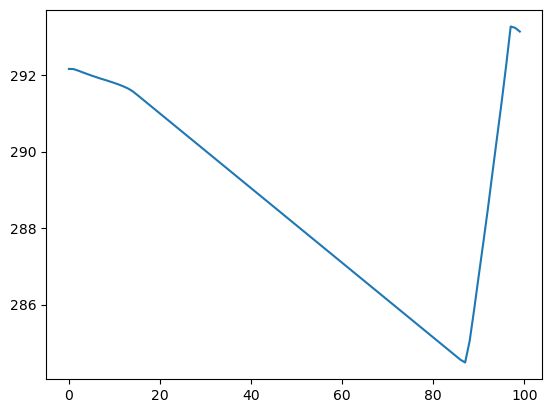

In [50]:
### PLOT THE DATA ###
# plt.figure()
plt.plot(T_prof_z)

In [104]:
PRES_prof_z = np.round(PRES_prof_z, 3)
PRES_prof_z

masked_array(data=[99941.23, 99824.41, 99707.75, 99591.23, 99474.79,
                   99358.51, 99242.35, 99126.27, 99010.3 , 98894.48,
                   98778.75, 98663.13, 98547.65, 98432.28, 98317.03,
                   98201.88, 98086.84, 97971.88, 97857.  , 97742.25,
                   97627.62, 97513.02, 97398.54, 97284.16, 97169.88,
                   97055.71, 96941.62, 96827.62, 96713.74, 96599.89,
                   96486.23, 96372.61, 96259.04, 96145.62, 96032.27,
                   95919.04, 95805.91, 95692.88, 95579.96, 95467.11,
                   95354.36, 95241.64, 95129.12, 95016.62, 94904.24,
                   94791.93, 94679.75, 94567.63, 94455.62, 94343.74,
                   94231.9 , 94120.22, 94008.59, 93897.03, 93785.62,
                   93674.26, 93563.01, 93451.88, 93340.79, 93229.88,
                   93119.  , 93008.25, 92897.53, 92786.98, 92676.48,
                   92566.09, 92455.77, 92345.62, 92235.49, 92125.49,
                   92015.52, 91905

In [111]:
rand_list = np.array([i for i in range(5, 1000, 10)])

rand_list

### MAKE TEXT THAT INCLUDE LIST OF NUMBERS ###
def make_text(list):
    
    list = np.round(list, 2)
    print(list)
    text = ''
    for i in list:
        text += f"{i} "
        if i % 10 == 0:
            text += '\n'
    return text

PRES_prof_z_4 = PRES_prof_z*10**(-2)
text = make_text(PRES_prof_z)
print(text)

[99941.23 99824.41 99707.75 99591.23 99474.79 99358.51 99242.35 99126.27
 99010.3  98894.48 98778.75 98663.13 98547.65 98432.28 98317.03 98201.88
 98086.84 97971.88 97857.   97742.25 97627.62 97513.02 97398.54 97284.16
 97169.88 97055.71 96941.62 96827.62 96713.74 96599.89 96486.23 96372.61
 96259.04 96145.62 96032.27 95919.04 95805.91 95692.88 95579.96 95467.11
 95354.36 95241.64 95129.12 95016.62 94904.24 94791.93 94679.75 94567.63
 94455.62 94343.74 94231.9  94120.22 94008.59 93897.03 93785.62 93674.26
 93563.01 93451.88 93340.79 93229.88 93119.   93008.25 92897.53 92786.98
 92676.48 92566.09 92455.77 92345.62 92235.49 92125.49 92015.52 91905.74
 91796.   91686.38 91576.83 91467.38 91358.   91248.75 91139.54 91030.49
 90921.51 90812.62 90703.77 90595.12 90486.49 90377.97 90269.51 90161.15
 90053.02 89945.34 89838.05 89731.25 89624.88 89519.01 89413.62 89308.63
 89204.12 89100.12 88996.38 88892.75]
99941.2265625 99824.40625 99707.75 99591.2265625 99474.7890625 99358.5078125 99242.351

In [121]:
def clone_num(num, n):
    text = ''
    for i in range(n):
        text += f"{num} "
        if i+1 % 10 == 0:
            text += '\n'
    return text

list_num = clone_num(1.500E-01, 100)
list_num

'0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 '

In [131]:
lis = []
for i in range(0, 100):
    lis.append(995-10*i)

list = np.array(lis)

### Change num to text
def change_num_to_text(list):
    text = ''
    for i in list:
        text += f"{i} "
        if i % 10 == 0:
            text += '\n'
    return text

change_num_to_text(list)

'995 985 975 965 955 945 935 925 915 905 895 885 875 865 855 845 835 825 815 805 795 785 775 765 755 745 735 725 715 705 695 685 675 665 655 645 635 625 615 605 595 585 575 565 555 545 535 525 515 505 495 485 475 465 455 445 435 425 415 405 395 385 375 365 355 345 335 325 315 305 295 285 275 265 255 245 235 225 215 205 195 185 175 165 155 145 135 125 115 105 95 85 75 65 55 45 35 25 15 5 '

In [145]:


list = np.array([])


for i in np.arange(0.05, 1.00, 0.10):
    for j in np.arange(0.05, 1.00, 0.10):
        list = np.append(list, f'1 {i} {j}')

def list_to_text(list):
    text_output = '\n'.join(list)
    return text_output

text = list_to_text(list)

file_path = f'../data/view_points10x10.txt'
with open(file_path, 'w') as file:
    file.write(text)


text



# text = libgen.array_to_input(array)
        
# array

'1 0.05 0.05\n1 0.05 0.15000000000000002\n1 0.05 0.25000000000000006\n1 0.05 0.35000000000000003\n1 0.05 0.45000000000000007\n1 0.05 0.5500000000000002\n1 0.05 0.6500000000000001\n1 0.05 0.7500000000000002\n1 0.05 0.8500000000000002\n1 0.05 0.9500000000000002\n1 0.15000000000000002 0.05\n1 0.15000000000000002 0.15000000000000002\n1 0.15000000000000002 0.25000000000000006\n1 0.15000000000000002 0.35000000000000003\n1 0.15000000000000002 0.45000000000000007\n1 0.15000000000000002 0.5500000000000002\n1 0.15000000000000002 0.6500000000000001\n1 0.15000000000000002 0.7500000000000002\n1 0.15000000000000002 0.8500000000000002\n1 0.15000000000000002 0.9500000000000002\n1 0.25000000000000006 0.05\n1 0.25000000000000006 0.15000000000000002\n1 0.25000000000000006 0.25000000000000006\n1 0.25000000000000006 0.35000000000000003\n1 0.25000000000000006 0.45000000000000007\n1 0.25000000000000006 0.5500000000000002\n1 0.25000000000000006 0.6500000000000001\n1 0.25000000000000006 0.7500000000000002\n1 0

In [ ]:
1 0.05 0.05\n
1 0.05 0.15000000000000002\n1 0.05 0.25000000000000006\n1 0.05 0.35000000000000003\n1 0.05 0.45000000000000007\n1 0.05 0.5500000000000002\n1 0.05 0.6500000000000001\n1 0.05 0.7500000000000002\n1 0.05 0.8500000000000002\n1 0.05 0.9500000000000002\n1 0.15000000000000002 0.05\n1 0.15000000000000002 0.15000000000000002\n1 0.15000000000000002 0.25000000000000006\n1 0.15000000000000002 0.35000000000000003\n1 0.15000000000000002 0.45000000000000007\n1 0.15000000000000002 0.5500000000000002\n1 0.15000000000000002 0.6500000000000001\n1 0.15000000000000002 0.7500000000000002\n1 0.15000000000000002 0.8500000000000002\n1 0.15000000000000002 0.9500000000000002\n1 0.25000000000000006 0.05\n1 0.25000000000000006 0.15000000000000002\n1 0.25000000000000006 0.25000000000000006\n1 0.25000000000000006 0.35000000000000003\n1 0.25000000000000006 0.45000000000000007\n1 0.25000000000000006 0.5500000000000002\n1 0.25000000000000006 0.6500000000000001\n1 0.25000000000000006 0.7500000000000002\n1 0.25000000000000006 0.8500000000000002\n1 0.25000000000000006 0.9500000000000002\n1 0.35000000000000003 0.05\n1 0.35000000000000003 0.15000000000000002\n1 0.35000000000000003 0.25000000000000006\n1 0.35000000000000003 0.35000000000000003\n1 0.35000000000000003 0.45000000000000007\n1 0.35000000000000003 0.5500000000000002\n1 0.35000000000000003 0.6500000000000001\n1 0.35000000000000003 0.7500000000000002\n1 0.35000000000000003 0.8500000000000002\n1 0.35000000000000003 0.9500000000000002\n1 0.45000000000000007 0.05\n1 0.45000000000000007 0.15000000000000002\n1 0.45000000000000007 0.25000000000000006\n1 0.45000000000000007 0.35000000000000003\n1 0.45000000000000007 0.45000000000000007\n1 0.45000000000000007 0.5500000000000002\n1 0.45000000000000007 0.6500000000000001\n1 0.45000000000000007 0.7500000000000002\n1 0.45000000000000007 0.8500000000000002\n1 0.45000000000000007 0.9500000000000002\n1 0.5500000000000002 0.05\n1 0.5500000000000002 0.15000000000000002\n1 0.5500000000000002 0.25000000000000006\n1 0.5500000000000002 0.35000000000000003\n1 0.5500000000000002 0.45000000000000007\n1 0.5500000000000002 0.5500000000000002\n1 0.5500000000000002 0.6500000000000001\n1 0.5500000000000002 0.7500000000000002\n1 0.5500000000000002 0.8500000000000002\n1 0.5500000000000002 0.9500000000000002\n1 0.6500000000000001 0.05\n1 0.6500000000000001 0.15000000000000002\n1 0.6500000000000001 0.25000000000000006\n1 0.6500000000000001 0.35000000000000003\n1 0.6500000000000001 0.45000000000000007\n1 0.6500000000000001 0.5500000000000002\n1 0.6500000000000001 0.6500000000000001\n1 0.6500000000000001 0.7500000000000002\n1 0.6500000000000001 0.8500000000000002\n1 0.6500000000000001 0.9500000000000002\n1 0.7500000000000002 0.05\n1 0.7500000000000002 0.15000000000000002\n1 0.7500000000000002 0.25000000000000006\n1 0.7500000000000002 0.35000000000000003\n1 0.7500000000000002 0.45000000000000007\n1 0.7500000000000002 0.5500000000000002\n1 0.7500000000000002 0.6500000000000001\n1 0.7500000000000002 0.7500000000000002\n1 0.7500000000000002 0.8500000000000002\n1 0.7500000000000002 0.9500000000000002\n1 0.8500000000000002 0.05\n1 0.8500000000000002 0.15000000000000002\n1 0.8500000000000002 0.25000000000000006\n1 0.8500000000000002 0.35000000000000003\n1 0.8500000000000002 0.45000000000000007\n1 0.8500000000000002 0.5500000000000002\n1 0.8500000000000002 0.6500000000000001\n1 0.8500000000000002 0.7500000000000002\n1 0.8500000000000002 0.8500000000000002\n1 0.8500000000000002 0.9500000000000002\n1 0.9500000000000002 0.05\n1 0.9500000000000002 0.15000000000000002\n1 0.9500000000000002 0.25000000000000006\n1 0.9500000000000002 0.35000000000000003\n1 0.9500000000000002 0.45000000000000007\n1 0.9500000000000002 0.5500000000000002\n1 0.9500000000000002 0.6500000000000001\n1 0.9500000000000002 0.7500000000000002\n1 0.9500000000000002 0.8500000000000002\n1 0.9500000000000002 0.9500000000000002